In [85]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [86]:
def read_image(path: str) -> np.ndarray:
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

def show_image(image: np.ndarray, color=cv2.COLOR_GRAY2RGB) -> None:
    if color is not None:
        rgb_image = cv2.cvtColor(image, color)
    else:
        rgb_image = image
    plt.figure(figsize=(10, 14))
    plt.axis('off')
    
    plt.imshow(rgb_image)

def detect_contours(image: np.ndarray) -> np.ndarray:
    new_image = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB)
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([120, 70, 70])
    mask = cv2.inRange(new_image, lowerb=lower_black, upperb=upper_black)
    black_cnt = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]
    return black_cnt

def mark_contours(image: np.ndarray, contours: np.ndarray) -> np.ndarray:
    new_image = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB)
    marked_area = sorted(contours, key=cv2.contourArea, reverse=True)
    print({cv2.contourArea(x): cv2.boundingRect(x) for x in marked_area[:20]})
    for m_area in marked_area[6:11]:
        (xg,yg,wg,hg) = cv2.boundingRect(m_area)
        cv2.rectangle(new_image,(xg,yg),(xg+wg, yg+hg),(0,255,0),2)
    return new_image


In [87]:
image = read_image('exams/image--000.jpg')
# show_image(image)

{667968.5: (617, 1305, 437, 1552), 665263.0: (1377, 1308, 434, 1553), 47299.0: (1350, 640, 629, 80), 35471.0: (560, 608, 462, 107), 19442.0: (763, 846, 292, 70), 9578.5: (763, 975, 147, 68), 2315.5: (2012, 3023, 52, 48), 2271.5: (2019, 503, 52, 48), 2228.5: (297, 3015, 49, 48), 2227.5: (815, 498, 50, 47), 2203.5: (303, 495, 50, 47), 556.0: (486, 965, 30, 30), 515.0: (547, 600, 25, 28), 441.0: (2015, 343, 20, 33), 435.0: (1606, 341, 20, 33), 422.5: (908, 390, 20, 33), 410.5: (574, 328, 24, 32), 407.0: (921, 329, 20, 33), 401.0: (947, 338, 20, 33), 398.0: (1375, 339, 20, 33)}


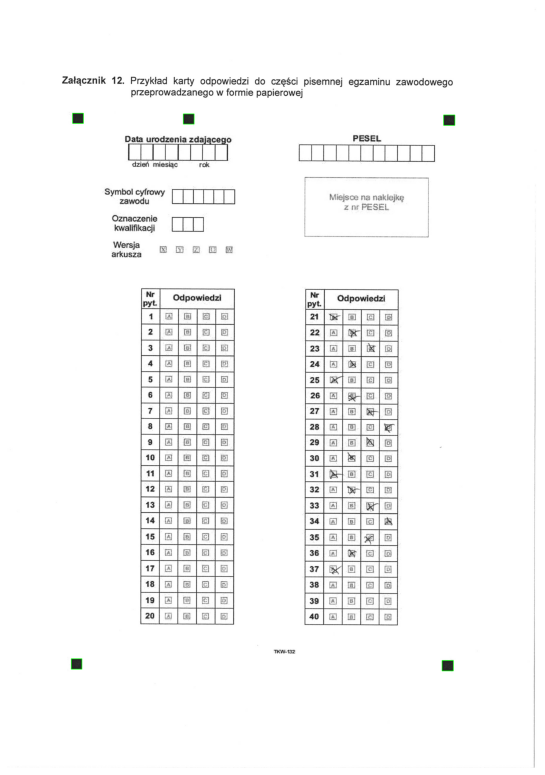

In [88]:
ret, threshold = cv2.threshold(image, 127, 255, 0)
cv2.bitwise_not(threshold, threshold)
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = detect_contours(image=image)
bounded_squares = mark_contours(image, contours)
show_image(bounded_squares, None)
# show_image(cv2.drawContours(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB), contours, -1, (0, 255, 0), 3), color=None)
# show_image(image)